# Assignment
### Monte Carlo Simulations using Numpy

In [8]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problem 1: Coin toss simulation

In this problem you will simulate the toss of a coin for various number of trials. This is to see the "Law of large numbers" in action. 

Each experiment will involve 100 trials of varying number of coin tosses. 
The number of coin tosses will range from 10 to 1000000 (1 million)

So there are a total of 6 experiments (num tosses = 10, 100, 1000, 10000, 100000 and 1000000)
To illustrate, in the 3rd simulation you will toss a coin a 1000 times for 100 trials. After tossing the coin 1000 times in each trial, you will calculate the % of heads tossed. Do this a 100 times and take the mean value of %heads and the standard deviation for the same. Do this for each of the simulations / experiments.

If you did this right you should see that the expected value of %heads approaches the true expected value (0.5) and the standard deviation decreases as the number of tosses increases.

In [9]:
def coin_toss(num_tosses=1000, num_trials=100):
    mean = 0
    std = 0
    
    mean = np.random.choice([0,1],size=num_tosses*num_trials).mean()
    std = np.random.choice([0,1],size=num_tosses*num_trials).std()
    
    return mean, std


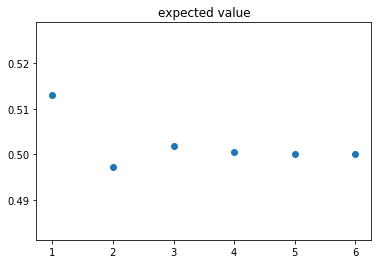

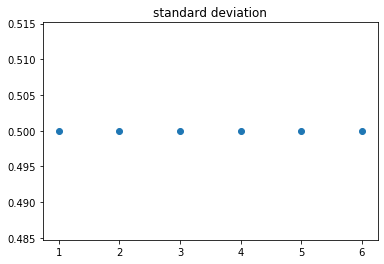

In [10]:
# driver code

means = []    
stds = []

exps = list(range(1, 7))
for exp in exps:
    mean, std = coin_toss(10**exp, 100)
    means.append(mean)
    stds.append(std)

# plot results
plt.scatter(exps, means)
plt.title("expected value")
plt.show()
plt.scatter(exps, stds)
plt.title("standard deviation")
plt.show()

### Problem 2: Dice toss simulation

In this problem you will simulate the toss of a couple dice for various number of trials. 
 
The number of tosses will range from 10 to 1000000 (1 million)

So there are a total of 6 experiments (num tosses = 10, 100, 1000, 10000, 100000 and 1000000)

In [11]:
def dice_toss(num_tosses=1000):
    #res = np.zeros(num_tosses)
    
    dice = np.arange(1,7)
    res = np.random.choice(dice,size=num_tosses).mean()
    
    return res


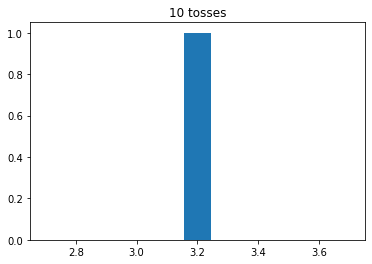

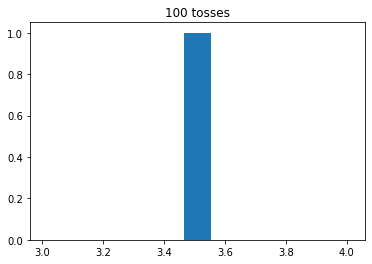

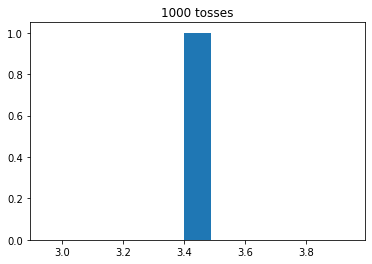

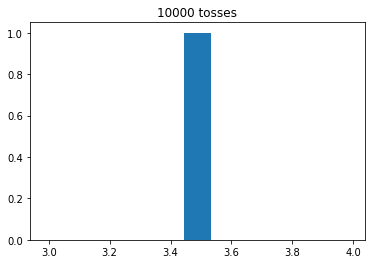

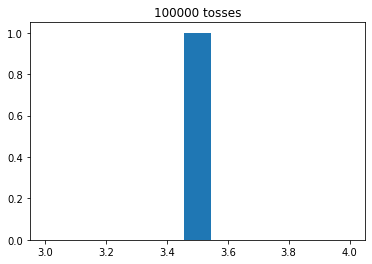

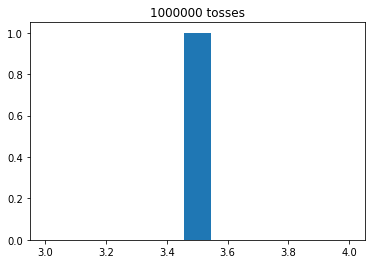

In [12]:
exps = list(range(1, 7))
for exp in exps:
    res = dice_toss(10**exp)
    plt.hist(res, bins=11)
    plt.title(str(10**exp) + " tosses")
    plt.show()

### Problem 3: Buffon's Needle Experiment

In this problem you will estimate the value of pi using Monte Carlo Simulations.

The idea is to estimate the value of pi using randomly placed needles in a unit square and an inscribed unit radius circle.

The ratio of number of points in the circle to the total number of points should be the same of the ratio of the areas of the two shapes.

Using this information, you should write code to estimate the value of pi. 

The task is to keep increasing the number of points used till your estimate of pi is accurate to first 3 decimal places. 

In [13]:
def dist_from_origin(x, y):
    return np.sqrt(np.add(np.square(x),np.square(y)))

def estimate_pi(num_needles=100):
    
    pi_est = 0
    
    np.random.seed(123)
    
    x = np.random.uniform(-1,1,size=num_needles)
    y = np.random.uniform(-1,1,size=num_needles)
    
    dist = dist_from_origin(x,y)
    
    pi_est = 4 * (len(dist[dist<1]) / num_needles)

# Calculating number of needles requrired for estimating pi to 3.141    
#     if int(pi_est * 1000)/1000.0 == 3.141:
#         print(pi_est)
#         print(num_needles)

    return pi_est

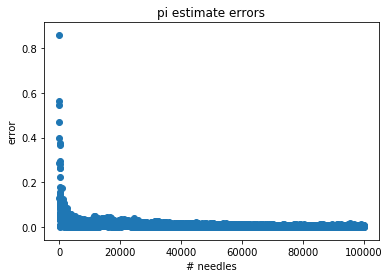

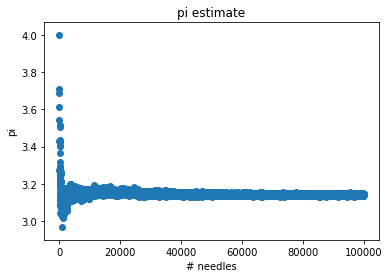

In [14]:
import math
diffs = []
pi_estimates = []
stop = 100000
xs = range(1, stop, 10)
for num_needles in xs:
    pi_est = estimate_pi(num_needles)
    pi_estimates.append(pi_est)
    diffs.append(abs(pi_est - math.pi))
    
plt.scatter(x=xs, y=diffs)
plt.title("pi estimate errors")
plt.xlabel('# needles')
plt.ylabel('error')
plt.show()

plt.scatter(x=xs, y=pi_estimates)
plt.title("pi estimate")
plt.xlabel('# needles')
plt.ylabel('pi')
plt.show()

Question: how many needles did you need to use to get within the actual value of pi to 3 decimal places?

Using seed 123 we get 3.141361256544503 at 191 needles (see commented if portion)

### Problem 4: Random Walks

In this problem you will simulate random walks in many dimensions. 

In [21]:
"""
dist_manhattan returns the manhattan distance between two points
"""
def dist_manhattan(x, y):
    dist = -1
    dist = np.sum(np.abs(np.subtract(x, y)))
    return dist

"""
dist_euclidean returns the euclidean distance between two points
"""
def dist_euclidean(x, y):
    dist = -1
    dist =  np.sqrt(np.sum(np.square(np.subtract(x, y))))
    return dist

In [22]:
def random_walk(dims=1, steps=10000):
    
    manhattan, euclidean = -1, -1
    origin = np.zeros((1,dims))
    
    end = np.sum(np.random.choice([-1,0,1], size=(steps,dim)))
    
    manhattan = dist_manhattan(origin, end)
    euclidean = dist_euclidean(origin, end)
    
    return manhattan, euclidean

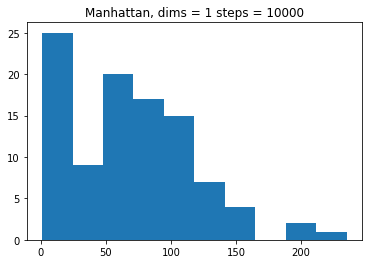

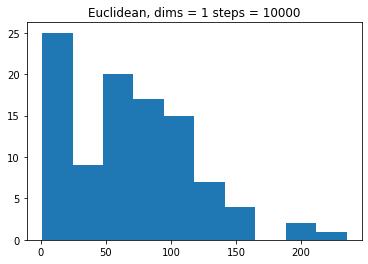

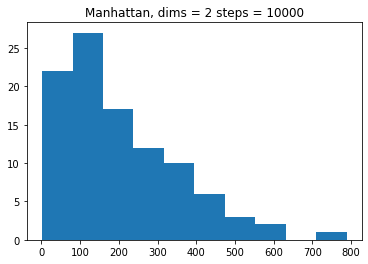

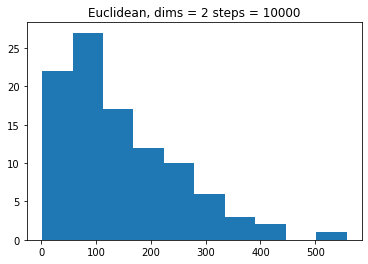

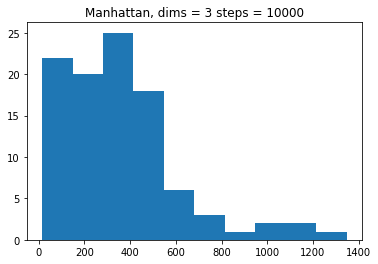

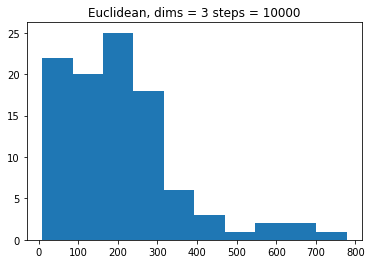

In [23]:
dims = list(range(1, 4))
num_walks = 100
num_steps = 10000

for dim in dims:
    manhattans = []
    euclideans = []
    for i in range(num_walks):
        manhattan, euclidean = random_walk(dim, num_steps)
        manhattans.append(manhattan)
        euclideans.append(euclidean)
    plt.hist(manhattans)
    plt.title("Manhattan, dims = " + str(dim) + " steps = " + str(num_steps))
    plt.show()
    plt.hist(euclideans)
    plt.title("Euclidean, dims = " + str(dim) + " steps = " + str(num_steps))
    plt.show()

In [ ]:
np.random.binomial(10, 0.5, 2)

In [ ]:
np.random.choice([0, 1], 1000, p=[0.2, 0.8]).mean()